In [7]:
import lightkurve as lk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from astropy.coordinates import SkyCoord

from multiprocessing import Pool

from tqdm import tqdm
import os
import glob
import shutil
import time

from Kakapo.build_epsf import epsf_data_creation
from Kakapo.kakapo import Kakapo
from Kakapo.send_myself_email import send_mail

from photutils.aperture import RectangularAperture, RectangularAnnulus,CircularAperture, CircularAnnulus
from photutils.aperture import ApertureStats, aperture_photometry
from photutils.psf import extract_stars, EPSFStars, EPSFBuilder

import warnings

warnings.filterwarnings('ignore')

%matplotlib widget

In [8]:
def uno_reverse():
    # List of directories to clean
    directories = [
        "filtered_stars",
        "csv_files",
        "detected_events",
        "difference_arrays",
        "object_ids", 
        "figures"
    ]
    
    for directory in directories:  # Iterate over each directory
        folder_path = os.path.join(os.getcwd(), "Data/" + directory)  # Create the full path to the directory
        # print(folder_path)
        
        if os.path.exists(folder_path) and os.path.isdir(folder_path):  # Check if the folder exists
            for root, dirs, files in os.walk(folder_path, topdown=False):  # Walk through the directory tree
                for file in files: # Delete all files in the directory (in reverse order)
                    file_path = os.path.join(root, file)
                    try:
                        os.remove(file_path)
                    except Exception as e:
                        print(f"Failed to delete file {file_path}: {e}")
                
                for dir in dirs: # Delete all subdirectories
                    dir_path = os.path.join(root, dir)
                    try:
                        os.rmdir(dir_path)  # Remove the empty directory
                    except Exception as e:
                        print(f"Failed to delete directory {dir_path}: {e}")

            try: # Once all files and subdirectories are removed, remove the main directory itself
                os.rmdir(folder_path)  # Remove the now-empty directory
            except Exception as e:
                print(f"Failed to delete main directory {folder_path}: {e}")
        else:
            print(f"Directory does not exist: {folder_path}")
            
    for directory in directories:  # Iterate over each directory
        folder_path = os.path.join(os.getcwd(), "Data/" + directory)  # Create the full path to the directory
        # print(folder_path)
        os.mkdir(folder_path)

In [9]:
def download_tpfs():
    """
    """

    df = pd.read_csv('/Users/zgl12/testing.csv')#, encoding='ISO-8859-1')
    # df.to_csv('/Users/zgl12/testing.csv', encoding='utf-8', index=False)

    test_case = []

    for j in tqdm(range(7, len(df)), desc='Downloading TPFs'):
        test_case_df = df.iloc[j]

        camp = int(float(test_case_df['Field'].split('C')[-1]))
        test_case_df = df.iloc[j]
        
        if '/' in str(test_case_df['KIC/EPIC']):
            test_case_df['KIC/EPIC'] = float(test_case_df['KIC/EPIC'].split('/')[0])

        res = lk.search_targetpixelfile(test_case_df['KIC/EPIC'], mission='K2', campaign=camp)
        try:
            tpf0 = res[0].download(quality_bitmask=0)
            # tpf1 = res[1].download(quality_bitmask=0)
            test_case.append(tpf0)
        except:
            continue

    # targets_to_add = [211484776, 201495875, 201553364]

    # for epic in tqdm(targets_to_add, desc='Downloading TPFs'):
    #     res = lk.search_targetpixelfile(epic, mission='K2')
        
    #     for j in range(len(res)):
    #         tpf = res[j].download(quality_bitmask=0)
    #         test_case.append(tpf)
            
    return test_case

def access_tpfs():
    """
    """

    test_case = []

    lightkurve_file_folder = '/Users/zgl12/.lightkurve/cache/mastDownload/K2/'

    files = sorted(glob.glob(lightkurve_file_folder + '*/*.fits.gz'))

    for file in tqdm(files, desc='Reading TPFs'):
        tpf = lk.read(file)
        test_case.append(tpf)
        
    return test_case

In [10]:
uno_reverse()

# test_case = download_tpfs()
test_case = access_tpfs()

# test_case = test_case[:10]

# print(test_case[0])

Reading TPFs: 100%|██████████| 74/74 [00:18<00:00,  3.95it/s]


Finding Gaia stars: 100%|██████████| 74/74 [00:02<00:00, 25.88it/s]


EPSFBuilder (30 maxiters):   0%|          | 0/30 [00:00<?, ?it/s]

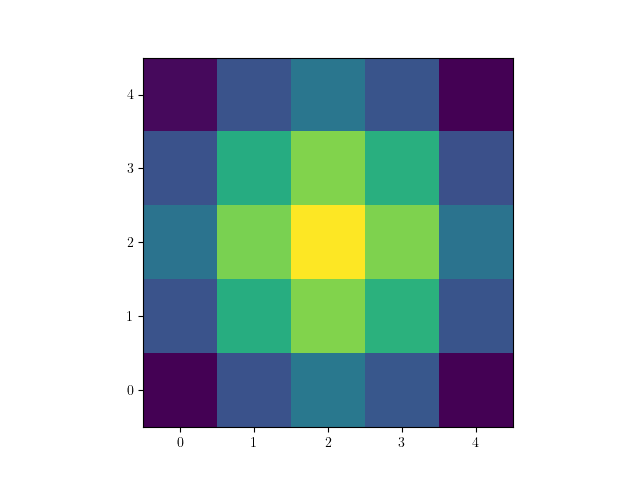

In [12]:

# epsf_data = np.load('/Users/zgl12/Python_Scripts/K2/epsf.npy')

epsf_data = epsf_data_creation(test_case, path = '/Users/zgl12/Modules/Kakapo/', overwrite = True, stop_cond = 120, sampling = 1)

plt.figure()
plt.imshow(epsf_data[2:-2, 2:-2], origin = 'lower')
plt.show()

In [6]:
# start = time.time()

# kea = Kakapo(test_case, epsf_data[2:-2, 2:-2], num_cores = 5, 
#              filtered = True, overwrite = True, savepath = './Data/',
#              mask_value = 1200, tol = 0.003, std1 = 3, std2 = 3, detect = True, 
#              corrlim = 0.2, difflim = 1.1, fwhmlim = 5, maxlim = 0, snrlim = 4,
#              roundness = 0.7, poiss_val = 1, siglim = 2)

In [7]:
# # Define the file path
# file_path = 'time_file.txt'

# line = f"Kakapo time taken: {((time.time() - start)/3600):.2f} hrs"

# with open(file_path, 'w') as f:
#     f.write(line)

# send_mail()

In [ ]:
epsf_data

In [ ]:
plt.figure()
plt.imshow(epsf_data, origin = 'lower')
plt.show()